# PART-1_Creating Features

In [1]:
import pandas as pd

In [2]:
so_survey_df= pd.read_csv("D:\DATASETS/so_survey_csv.csv")

In [3]:
print(so_survey_df.head())

      SurveyDate                                    FormalEducation  \
0  2/28/18 20:20           Bachelor's degree (BA. BS. B.Eng.. etc.)   
1  6/28/18 13:26           Bachelor's degree (BA. BS. B.Eng.. etc.)   
2    6/6/18 3:37           Bachelor's degree (BA. BS. B.Eng.. etc.)   
3    5/9/18 1:06  Some college/university study without earning ...   
4  4/12/18 22:41           Bachelor's degree (BA. BS. B.Eng.. etc.)   

   ConvertedSalary Hobby       Country  StackOverflowJobsRecommend  \
0              NaN   Yes  South Africa                         NaN   
1          70841.0   Yes       Sweeden                         7.0   
2              NaN    No       Sweeden                         8.0   
3          21426.0   Yes       Sweeden                         NaN   
4          41671.0   Yes            UK                         8.0   

      VersionControl  Age  Years Experience Gender   RawSalary  
0                Git   21                13   Male         NaN  
1     Git;Subversion  

In [4]:
print(so_survey_df.dtypes)

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


# SELECTING SPECIFIC DATA TYPES

In [5]:
so_numeric_df= so_survey_df.select_dtypes (include=["int","float"])
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend'], dtype='object')


# ENCODING CATEGORICAL FEATURES

In [6]:
#THESE ARE OF "TWO" TYPES
#1-- ONE-HOT ENCODING-- IT CREATES MUCH EXPLAINABLE FEATURES
#2-- DUMMY ENCODING -- IT GIVES US THE NECESSARY INFORMATION WITHOUT ANY DUPLICATION
#BOTH CODES ARE SIMILAR TO EACH OTHER....IN DUMMY ENCODING...WE WILL BE ADDING AN EXTRA STUFF
# THAT IS "drop_first=True"....

In [7]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded=pd.get_dummies(so_survey_df,columns=["Country"],prefix='OH')
one_hot_encoded.columns

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')

In [8]:
# Create dummy variables for the Country column(DUMMY ENCODING)
dummy_encoding=pd.get_dummies(so_survey_df,columns=["Country"],drop_first=True,prefix="DM")
print(dummy_encoding.columns)
#NOTE-- DUMMY ENCODING WILL REMOVE THE 1ST COMPONENT OF THE DATA

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


# DEALING WITH UNCOMMON CATEGORIES

In [9]:
# Create a series out of the Country column
countries = so_survey_df["Country"]

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts)

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64


In [10]:
# Create a mask for only categories that occur less than 10 times
mask= countries.isin(country_counts[country_counts<10].index)

print(mask.head())

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool


In [11]:
mask= countries.isin(country_counts[country_counts<10].index)

# Label all other categories as Other
countries[mask] = "other"
print(pd.value_counts(countries))

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
other            14
Name: Country, dtype: int64


<ipython-input-11-72ef00a0ddf5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries[mask] = "other"


# BINARIZING COULUMNS

In [12]:
#WE CAN USE THIS FOR MOST MACHINE LEARNING STUFFS...COZ BINARY LANGUAGE WOULD BE A WAY MORE EASE FACTOR THAN A
#NORMAL LANGUAGE TO BE USED IN MANY "MACHINE LEARNING" STUFFS...

In [13]:
# Create the Paid_Job column filled with zeros
so_survey_df["paid job"]=0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df["ConvertedSalary"]>0,"paid job"]=1
print(so_survey_df[["paid job","ConvertedSalary"]].head())

   paid job  ConvertedSalary
0         0              NaN
1         1          70841.0
2         0              NaN
3         1          21426.0
4         1          41671.0


# binning values

In [14]:
# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df['equal_binned']= pd.cut(so_survey_df["ConvertedSalary"],5)
print(so_survey_df[["equal_binned","ConvertedSalary"]].head())

          equal_binned  ConvertedSalary
0                  NaN              NaN
1  (-2000.0, 400000.0]          70841.0
2                  NaN              NaN
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


In [15]:
import numpy as np
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

#note--("-np.infinity to 10000" = VERY LOW)....THIS HOW THE "BINS AND LABELS" ARE INTERCONNECTED...!

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0


# THE END(CREATING FEATURE(PART_1))

# X-----X  :)

# PART-2_Dealing with Messy Data

1_WHY DO MISSING VALUES EXIST?

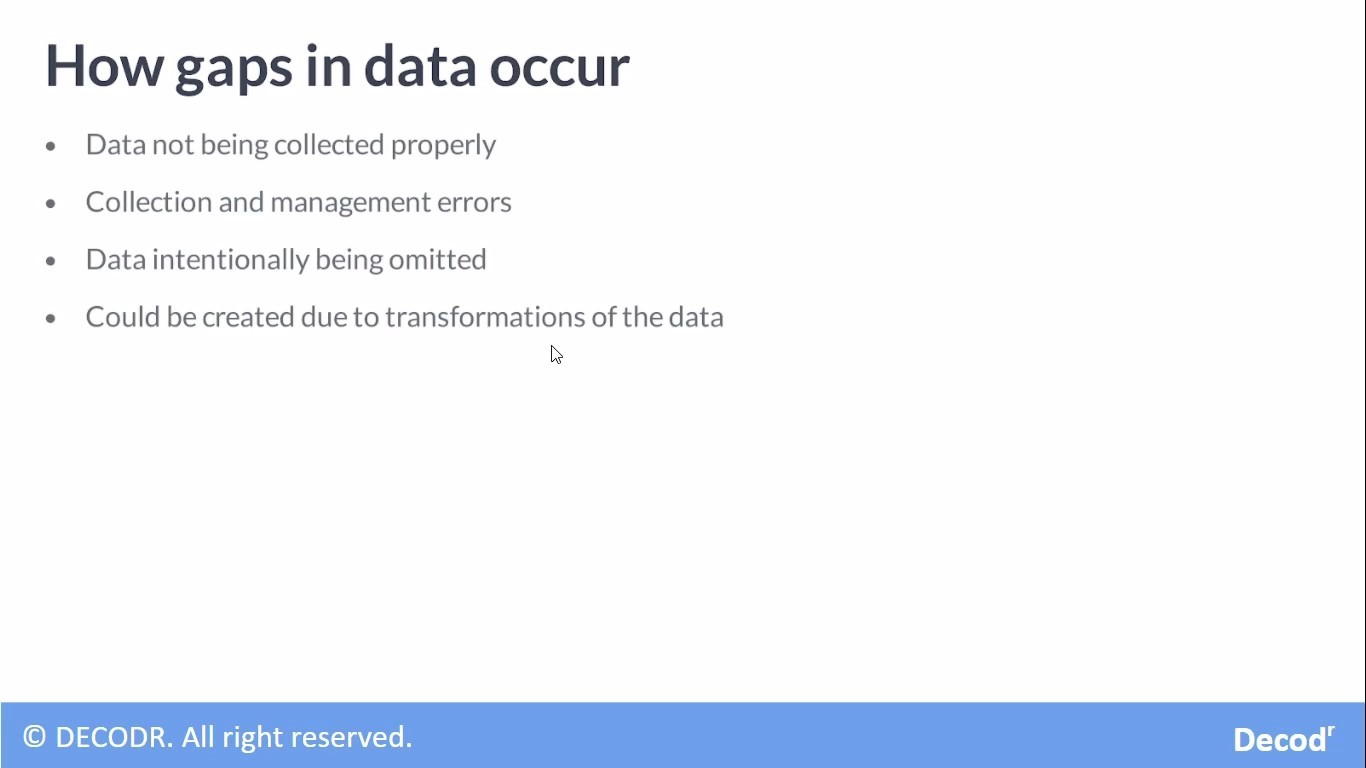

#USUALLY IN THIS WORLD MANY DATA WOULD HAVE SOME ERROR FOR SURE....THE ABOVE STUFFS ARE THE EXAMPLES FOR
THE COMMON ERRORS IN THE REAL TIME DATA IN OUT WORLD...!

# HOW SPARE IS MY DATA

In [16]:
# Subset the DataFrame
sub_df=so_survey_df[["Age","Gender"]]
# Print the number of non-missing values
print(sub_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     999 non-null    int64 
 1   Gender  693 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.7+ KB
None


# find the missing value

In [17]:
# Print the top 10 entries of the DataFrame
print(sub_df.head(10))

   Age  Gender
0   21    Male
1   38    Male
2   45     NaN
3   46    Male
4   39    Male
5   39    Male
6   34    Male
7   24  Female
8   23    Male
9   36     NaN


In [18]:
# Print the locations of the missing values
print(sub_df.head(10).isnull())

     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True


In [19]:
# Print the locations of the non-missing values
print(sub_df.head(10).notnull())

    Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False


# listwise deletion/complete case analysis
IF OUR DATA IS NOT INTENTIONALLY REMOVED IN THE SENSE...WE COULD JUST USE THIS METHOD!
IN THIS METHOD A RECORD IS FULLY EXCLUDED FROM THE MODEL(DATA)...."IF ANY OF IT'S VALUES ARE MISSING"


In [20]:
#WE CAN DROP THE ROWS WITH ATLEAST ONE MISSING VALUES...by using the
# "df.dropna(how='any')" COMMAND

In [21]:
#WE CAN DROP THE ROWS WITH MISSING VALUES IN A SPECIFIC COLUMN...BY USING THE
# "df.dropna(subset=['THE_RESPECTED_COLUMN_NAME'])" COMMAND

In [22]:
# Print the number of rows and columns
print(so_survey_df.shape)

(999, 14)


In [23]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna(how="any")

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(264, 14)


In [24]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how="any", axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(999, 8)


HERE AT 1ST...THE COLUMN IS TAKEN BY DEFAULT(BY PYTHON)...SO WE GOT 264 FROM 999
THEN...WE SPECIFIED THE AXIS="1"...WHICH CONSIDERS THE ROW AT THIS TIME
AND WE GOT 8 FROM 14

In [25]:
# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=["Gender"])

# Print the shape of the new DataFrame
print(no_gender.shape)

(693, 14)


DRAWBACKS OF "LISTWISE DELETION"

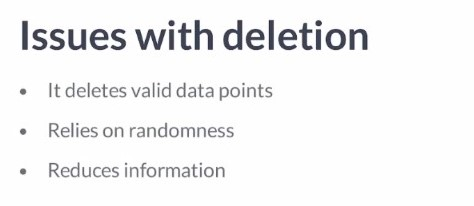

SO...IN ORDER TO SOLVE THIS MISSING VALUES PROBLEM...WE OFTEN REPLACE THOSE "MISSING VALUES" WITH 
SOME STRINGS

# Replacing missing values with constants

In [26]:
# Print the count of occurrences
print(so_survey_df["Gender"].value_counts())

Male                                                                         632
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Female;Transgender                                                             1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Name: Gender, dtype: int64


In [27]:
#REPLACING MISIING VALUES
so_survey_df['Gender'].fillna(value= "not given",inplace=True) #without this "inplace=True" command....
#"not given" will not get included in the output
print(so_survey_df["Gender"].value_counts())

Male                                                                         632
not given                                                                    306
Female                                                                        53
Transgender                                                                    2
Female;Male                                                                    2
Female;Transgender                                                             1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Name: Gender, dtype: int64


# NOTE
1_CATEGORICAL COLUMNS-- HERE WE CAN REPLACE THE MISSING VALUES WITH SOME STRINGS AS WE DISCUSSED ABOVE.............
2_NUMERIC COULMNS-- HERE WE WOULD REPLACE THE  MISSING VALUES WITH A "SUITABLE VALUE"......................................
# FOR EXAMPLE(suitable values):-
    MEASURES OF CENTRAL TENDENCY-
         *MEAN
         *MEDIAN

# Fill continuous missing values

In [28]:
# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [29]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(),inplace=True)
print (so_survey_df['StackOverflowJobsRecommend'].head())

0    7.061602
1    7.000000
2    8.000000
3    7.061602
4    8.000000
Name: StackOverflowJobsRecommend, dtype: float64


HERE WE ARE JUST GONNA ROUND OFF THE DECIMAL NUMBERS....!

In [30]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend']= round(so_survey_df['StackOverflowJobsRecommend'])
print(so_survey_df['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


# DEALING WITH OTHER DATA ISSUES
# HERE WE WILL BE FACING TWO STUFFS...
1__Dealing with stray characters.............
2__Method chaining

In [31]:
#INTIAL VIEW OF THE "OUTPUT"
print(so_survey_df['RawSalary'].head())

0           NaN
1     70,841.00
2           NaN
3     21,426.00
4    £41,671.00
Name: RawSalary, dtype: object


# 1__DEALING WITH STRAY CHARECTERS (I)

In [32]:
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',','')
#PRINTING THE LATER RESULTS(REPLACED COMMAS WITH ''(EMPTY SPACES))
print(so_survey_df['RawSalary'].head())

0          NaN
1     70841.00
2          NaN
3     21426.00
4    £41671.00
Name: RawSalary, dtype: object


In [33]:
# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£','')
#PRINTING THE LATER RESULTS(REPLACED "£" SIGNS WITH ""(EMPTY SPACES))
print(so_survey_df['RawSalary'].head())

0         NaN
1    70841.00
2         NaN
3    21426.00
4    41671.00
Name: RawSalary, dtype: object


# Dealing with stray characters (II)

In [34]:
# Attempt to convert the column to numeric values
numeric_vals= pd.to_numeric(so_survey_df['RawSalary'],errors='coerce')
# Find the indexes of missing values
idx = numeric_vals.isna()
# Print the relevant rows
print(so_survey_df['RawSalary'][idx])

0            NaN
2            NaN
6            NaN
8            NaN
11           NaN
         ...    
990          NaN
992          NaN
994          NaN
996    $55000.00
997          NaN
Name: RawSalary, Length: 439, dtype: object


In [35]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')
# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype("float")

# Print the column
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


<ipython-input-35-970925bff549>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')


# 2_Method Chaining
THIS WOULD BE MUCH EASIER THAN THE 1ST METHOD

In [36]:
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype(str)\
                                .str.replace(',','')\
                                .str.replace('£','')\
                                .astype("float")
print(so_survey_df['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


# PART-3_Conforming to Statistical Assumptions

# NOTE:-
BEFORE BUILDING A MACHINE LEARNING MODEL....

WE OUGHT TO UNDERSTAND THE DISTRIBUTION OF OUR UNDERLYING DATA WOULD LOOK LIKE!

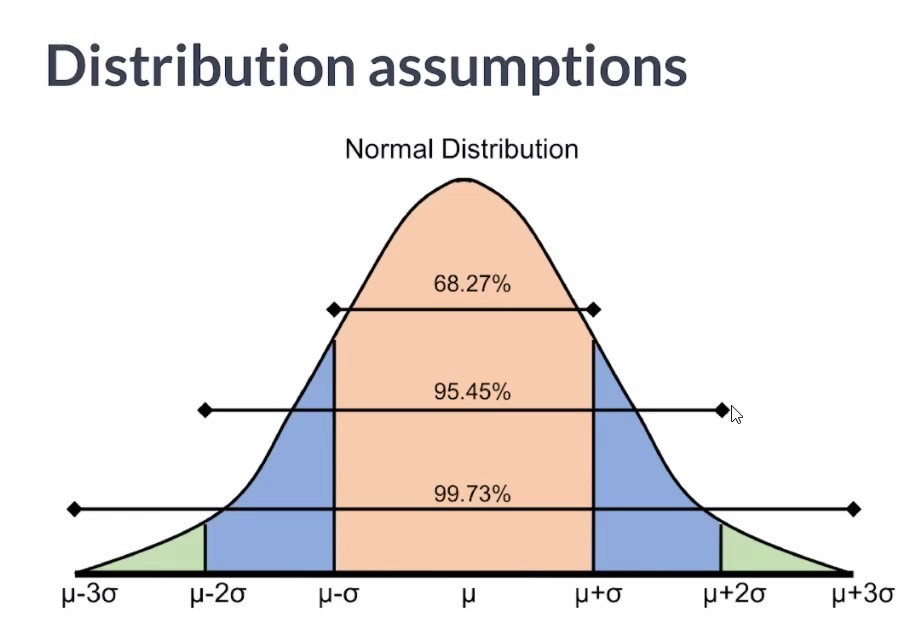
# GENERALLY A "NORMAL DISTRIBUTED" DATA WOULD BE REPRESENTED IN A BELL SHAPED MANNER

CHARECTERISTICS OF A NORMAL DISTRIBUTION:-
        
        1_68.27% OF OUR DATA LIES WITHIN "ONE STD" OF THE MEAN
        2_95.45% OF OUR DATA LIES WITHIN "TWO STD" OF THE MEAN
        3_99.73% OF OUR DATA LIES WITHIN "THREE STD" OF THE MEAN

# HOW DOES OUR DATA LOOKS LIKE?

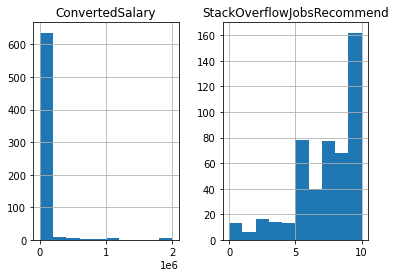

In [37]:
import matplotlib.pyplot as plt
#creating a histogram
so_numeric_df.hist()
plt.show()

   # BOX PLOT AND IT'S EXPLAINATION

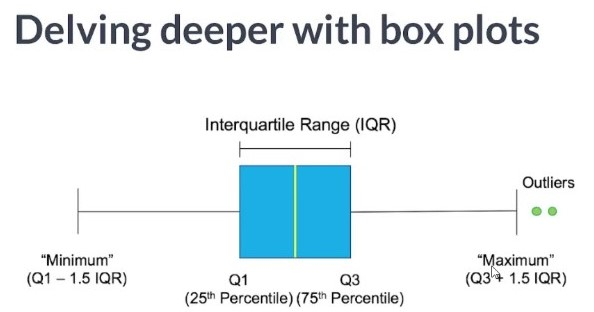

<function matplotlib.pyplot.show(close=None, block=None)>

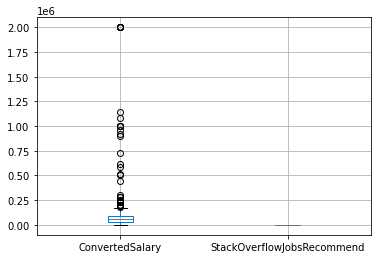

In [38]:
#CREATING A BOXPLOT...
so_numeric_df[['ConvertedSalary','StackOverflowJobsRecommend']].boxplot()
plt.show

# HOW DOES OUR DATA LOOKS LIKE?(II)

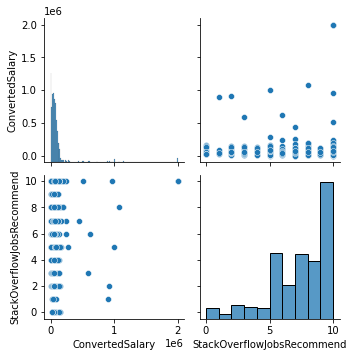

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting pairwise relationships
sns.pairplot(so_numeric_df)
plt.show()

In [40]:
#PRINTING THE SUMMARY STATISTICS
print(so_numeric_df.describe)

<bound method NDFrame.describe of      ConvertedSalary  StackOverflowJobsRecommend
0                NaN                         NaN
1            70841.0                         7.0
2                NaN                         8.0
3            21426.0                         NaN
4            41671.0                         8.0
..               ...                         ...
994              NaN                         NaN
995          58746.0                         8.0
996          55000.0                         NaN
997              NaN                         NaN
998        1000000.0                         NaN

[999 rows x 2 columns]>


# SCALING AND TRANSFORMATIONS
# SCALING:-
        IT IS GENERALLY USED BCOZ.....MOST MACHINE LEARNING ALGORITHMS REQUIRES YOUR DATA TO BE ON THE SAME SCALE....
        IN ORDER TO BE EFFECTIVE....
        FOR EXAMPLE:--
                IT IS DIFFICULT TO COMPARE THE "SALARY VALUES"(OFTEN MEASURED IN 1000s) WITH AGES...!

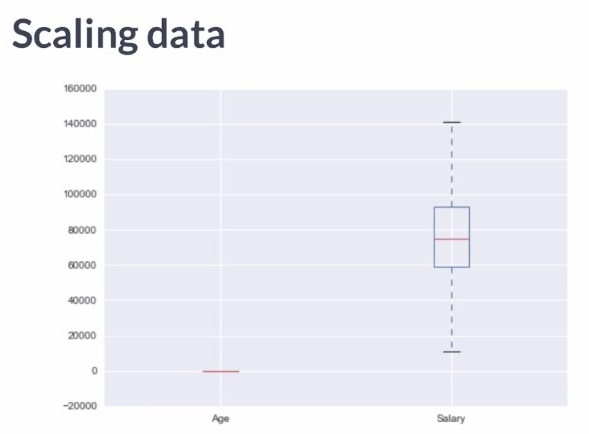

HENCE WE NEED TO HAVE SIMILAR "SCALES"!

IT CAN BE DONE BY "RESCALING THE DATA"
THE TWO MOST USED RESCALING METHODS ARE:-

    1-MIN_MAX SCALING/NORMALIZATION
    2-STANDARDIZATION

# 1-MIN_MAX SCALING/NORMALIZATION

In [41]:
from sklearn.preprocessing import MinMaxScaler 

# Instantiate MinMaxScaler
MM_scaler= MinMaxScaler()
# Fit MM_scaler to the data
MM_scaler.fit(so_survey_df[['Age']])

# Transform the data using the fitted scaler
so_survey_df['Age_MM'] = MM_scaler.transform(so_survey_df[['Age']])
# Compare the origional and transformed column
print(so_survey_df[['Age_MM','Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


# 2- STANDARDIZATION

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fitting SS_scaler to the data
SS_scaler.fit(so_survey_df[['Age']])

# Transforming the data using the fitted scaler
so_survey_df['Age_SS'] = SS_scaler.transform(so_survey_df[['Age']])

# Comparing the original and transformed column
print(so_survey_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


# TRANSFORMATION

 LOG TRANFORMATION:-

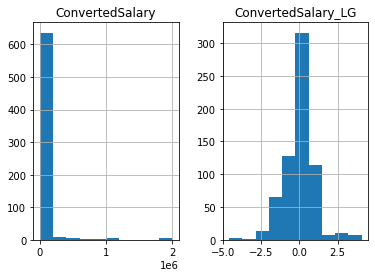

In [44]:
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_survey_df[["ConvertedSalary"]])

# Apply the power transform to the data
so_survey_df['ConvertedSalary_LG'] = pow_trans.transform(so_survey_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_survey_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

# Removing outliers

OUTLIERS-
        
      THESE ARE THE DATA POINTS THAT EXIST FAR AWAY FROM THE "MAJORITY VALUE" OF OUR DATA....
WE USUALLY REMOVE THESE OUTLIERS...COZ THESE OUTLIERS CAN "NEGATIVELY" IMPACT OUR MODEL


# OUTLIERS CAN BE REMOVED BY TWO METHODS!

        *Percentage based outlier removal
        *Statistical outlier removal

# Percentage based outlier removal

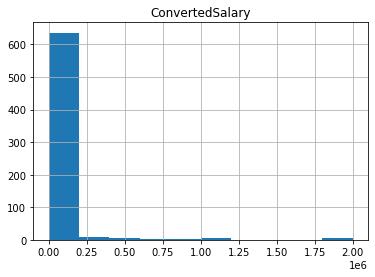

<Figure size 432x288 with 0 Axes>

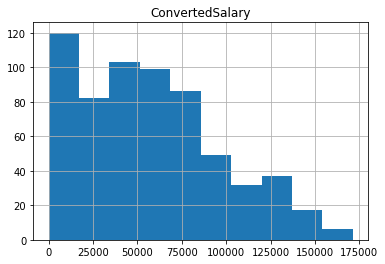

In [45]:
# Finding the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

#trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary']<quantile]

#the original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

#THE TRIMMED HISTOGRAM
trimmed_df[['ConvertedSalary']].hist()
plt.show()

# Statistical outlier removal

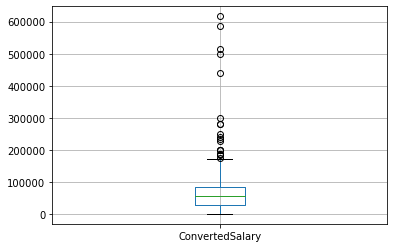

In [46]:
# Find the mean and std
std= so_numeric_df['ConvertedSalary'].std()
mean= so_numeric_df['ConvertedSalary'].mean()

#calculating the cutoff
cut_off= std*3
lower,upper= mean- cut_off,mean+ cut_off

#trimming the OUTLIERS
trimmed_df= so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper)
                          & (so_numeric_df['ConvertedSalary'] > lower)]

#trimmed box-plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

# Train and testing transformations (I)

In [47]:
so_train_numeric=so_survey_df.loc[:700,:]
so_test_numeric=so_survey_df.iloc[700:,:]

In [48]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.fit_transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

     Age    Age_ss
700   35 -0.091193
701   18 -1.396916
702   47  0.830495
703   57  1.598567
704   41  0.369651


<ipython-input-48-10bdd79b4532>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_test_numeric['Age_ss'] = SS_scaler.fit_transform(so_test_numeric[['Age']])


# Train and testing transformations (II)

In [49]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) 
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

# THE END....OF 3RD STUFF!

# ..........X---------X........ :)

# PART-4 Dealing with Text Data

GENERALLY BEFORE WORKING WITH "TEXT" DATA(LIKE THE DATA WHICH IS NOT IN THE PREDEFINED FORM(CALLED UNSTRUCTURED DATA(EXAMPLE--"FREE TEXT DATA!").....WE MUST CHANGE THEM INTO A TABULAR COLUMN FORMAT

IN MACHINE LEARNING....BEFORE WE USE THE "TEXT DATA"...WE OUGHT TO TRANSFORM THESE DATA INTO SERIES OF COLUMNS OF "NUMBERS" OR "VECTORS"....THERE ARE MANY DIFFERENT APPROACHES ARE THERE(FOR PERFORMING THIS STUFF)...!


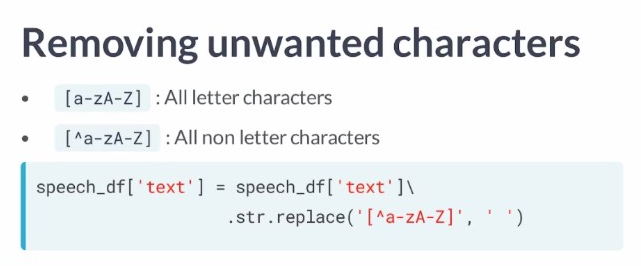

# Cleaning up your text

In [50]:
speech_df=pd.read_csv("D:\DATASETS/inaug_speeches.csv")
print(speech_df['text'].head())

0               Fellow-Citizens of the Senate and o...
1                Fellow Citizens:  ��I AM again cal...
2                ��WHEN it was first perceived, in ...
3                Friends and Fellow-Citizens:  ��CA...
4                ��PROCEEDING, fellow-citizens, to ...
Name: text, dtype: object


In [51]:
# Replace all non letter characters with a whitespace
speech_df["text_clean"]= speech_df['text'].str.replace('[^a-zA-Z]',' ')
speech_df["text_clean"].fillna(speech_df["text_clean"],inplace=True)#Changing the stuffs to lower case
speech_df["text_clean"]= speech_df['text_clean'].str.lower()
print(speech_df["text_clean"].head())


0               fellow citizens of the senate and o...
1                fellow citizens     i am again cal...
2                  when it was first perceived  in ...
3                friends and fellow citizens     ca...
4                  proceeding  fellow citizens  to ...
Name: text_clean, dtype: object


<ipython-input-51-68ddd94e2e41>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  speech_df["text_clean"]= speech_df['text'].str.replace('[^a-zA-Z]',' ')


# High level text features

In [52]:
#finding the length of the texts(charecters!)
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

#counting the number of words in EACH TEXT
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

#getting the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt']/speech_df['word_cnt']
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']].head())

                                          text_clean  char_cnt  word_cnt  \
0             fellow citizens of the senate and o...      8654      1432   
1              fellow citizens     i am again cal...       819       135   
2                when it was first perceived  in ...     13928      2323   
3              friends and fellow citizens     ca...     10184      1736   
4                proceeding  fellow citizens  to ...     12961      2169   

   avg_word_length  
0         6.043296  
1         6.066667  
2         5.995695  
3         5.866359  
4         5.975565  


# counting words(I)

In [53]:
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
#instantiate countvectorizer
cv = CountVectorizer()

#fit the countvectorizer
cv.fit(speech_df['text_clean'])
#print the feature name...
print(cv.get_feature_names())

['abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'abode', 'abolish', 'abolished', 'abolishing', 'aboriginal', 'aborigines', 'abound', 'abounding', 'abounds', 'about', 'above', 'abraham', 'abreast', 'abridging', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstaining', 'abstract', 'abstractions', 'absurd', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuses', 'academies', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accession', 'accident', 'accidental', 'accidents', 'acclaim', 'accommodation', 'accommodations', 'accompanied', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'accorded', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountab

# Counting words (II)

In [54]:
# Applying the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()
print(cv_array)

# Print the shape of cv_array
print(cv_array.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(59, 9037)


# Limiting your features

In [55]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2,max_df= 0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

(59, 826)


# Text to DataFrame

In [56]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

                Name         Inaugural Address                      Date  \
0  George Washington   First Inaugural Address  Thursday, April 30, 1789   
1  George Washington  Second Inaugural Address     Monday, March 4, 1793   
2         John Adams         Inaugural Address   Saturday, March 4, 1797   
3   Thomas Jefferson   First Inaugural Address  Wednesday, March 4, 1801   
4   Thomas Jefferson  Second Inaugural Address     Monday, March 4, 1805   

                                                text Unnamed: 4 Unnamed: 5  \
0             Fellow-Citizens of the Senate and o...        NaN        NaN   
1              Fellow Citizens:  ��I AM again cal...        NaN        NaN   
2              ��WHEN it was first perceived, in ...        NaN        NaN   
3              Friends and Fellow-Citizens:  ��CA...        NaN        NaN   
4              ��PROCEEDING, fellow-citizens, to ...        NaN        NaN   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Counts_women Counts_wor

# TERM FREQUENCY- INVERSE DOCUMENT FREQUENCY
# (TF-IDF)

WKT...COUNTS OF OCCURENCES OF WORDS IS REALLY HELPFUL IN ENCODING OUR "TEXTS" TO BUILD MODELS

SADLY...IT HAS SOME LIMITATIONS:(

    FOR EXAMPLE- A WORD MAY HAVE A HELL LOT OF REOCCURANCE IN A "TEXT-DATA"....IN ORDER TO NORMALIZE IT!
    WE USE A STUFF CALLED "TF-IDF"
    
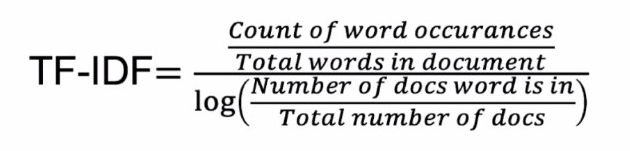

In [57]:
# Importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100,stop_words = 'english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  \
0      0.000000              0.133096       0.000000        0.105430   
1      0.000000              0.260359       0.265373        0.000000   
2      0.000000              0.092224       0.156666        0.073054   
3      0.000000              0.092476       0.000000        0.000000   
4      0.041235              0.039683       0.000000        0.031434   

   TFIDF_americans  TFIDF_believe  TFIDF_best  TFIDF_better  TFIDF_change  \
0              0.0       0.000000    0.000000      0.000000      0.000000   
1              0.0       0.000000    0.000000      0.000000      0.000000   
2              0.0       0.000000    0.026101      0.060334      0.000000   
3              0.0       0.090749    0.117778      0.045374      0.053137   
4              0.0       0.000000    0.067387      0.038941      0.091207   

   TFIDF_citizens  ...  TFIDF_things  TFIDF_time  TFIDF_today  TFIDF_union  \
0        0.230184  ...    

# Inspecting Tf-idf values

In [58]:
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.368295
TFIDF_public        0.333143
TFIDF_present       0.314620
TFIDF_duty          0.238361
TFIDF_citizens      0.230184
Name: 0, dtype: float64


# Transforming unseen data

In [59]:
train_speech_df=speech_df.iloc[:45,:]
test_speech_df=speech_df.iloc[45:,:]

In [60]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed = tv.transform(train_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), 
                          columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(test_tv_df.head())

   TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  \
0      0.000000              0.115053       0.000000        0.109851   
1      0.000000              0.225581       0.306307        0.000000   
2      0.000000              0.082273       0.186192        0.078553   
3      0.000000              0.078757       0.000000        0.000000   
4      0.041833              0.037095       0.000000        0.035418   

   TFIDF_authority  TFIDF_best  TFIDF_business  TFIDF_citizens  \
0         0.000000    0.000000             0.0        0.224688   
1         0.000000    0.000000             0.0        0.176216   
2         0.097587    0.025593             0.0        0.107114   
3         0.046708    0.110247             0.0        0.215327   
4         0.000000    0.069236             0.0        0.289774   

   TFIDF_commerce  TFIDF_common  ...  TFIDF_subject  TFIDF_support  \
0        0.000000      0.000000  ...       0.126587       0.000000   
1        0.000000      0.00000

# N-GRAMS
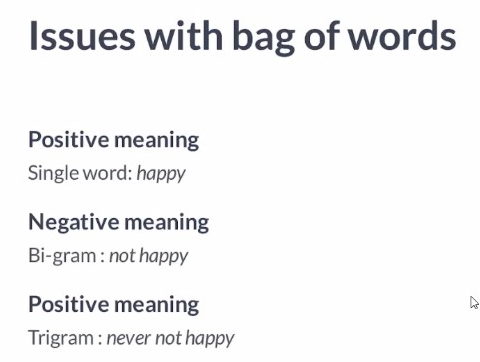

# Using longer n-grams

In [61]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3,3)) #3,3 is coz...we are finding tri-grams

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names())

['ability preserve protect', 'adequate necessary purposes', 'agriculture commerce manufactures', 'america ideal freedom', 'best ability preserve', 'best interests country', 'bless god bless', 'bless united states', 'chief justice mr', 'children children children', 'citizens united states', 'civil religious liberty', 'civil service reform', 'commerce united states', 'common defense promote', 'confidence fellow citizens', 'congress extraordinary session', 'constitution does expressly', 'constitution united states', 'convene congress extraordinary', 'coordinate branches government', 'day task people', 'decent satisfying life', 'defend constitution united', 'distinguished guests fellow', 'does expressly say', 'equal exact justice', 'era good feeling', 'executive branch government', 'faithfully execute office', 'federal government reserved', 'fellow citizens assembled', 'fellow citizens called', 'fellow citizens large', 'fellow citizens nation', 'fellow citizens obedience', 'fellow citizens

# Finding the most common words

In [62]:
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
print(cv_tri_df.sum().sort_values(ascending=False).head())

Counts_constitution united states    20
Counts_people united states          13
Counts_mr chief justice              10
Counts_preserve protect defend       10
Counts_president united states        8
dtype: int64


# SUMMARY